In [ ]:
import numpy as np
import pandas as pd
import pickle
import sklearn as skl
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint, expon
from sklearn.model_selection import GroupKFold, KFold

from sklearn.model_selection import train_test_split

In [ ]:
pip install forestci


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import math
import pickle
from datetime import datetime
import time
from collections import Counter
import forestci as fci
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import scipy.stats as st
import matplotlib.patches as mpatches

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BatteryDS/dataaaaa.csv')

In [ ]:
data


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,1.001205,10/16/2015 09:34:19,1.001206,1,1,0.0,3.434257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,2,2.016763,10/16/2015 09:34:20,2.016764,1,1,0.0,3.434418,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
2,3,3.032254,10/16/2015 09:34:21,3.032255,1,1,0.0,3.434581,0.000000,0.000000,0.000000,0.000000,0.000065,0.000000,0,0,0
3,4,4.032554,10/16/2015 09:34:22,4.032555,1,1,0.0,3.434581,0.000000,0.000000,0.000000,0.000000,0.000065,0.000000,0,0,0
4,5,5.047983,10/16/2015 09:34:23,5.047983,1,1,0.0,3.434257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27597,27598,33517.465620,10/16/2015 18:52:57,296.183986,12,1,0.0,4.195723,4.005512,2.009444,15.628879,7.179247,-0.000065,0.120664,0,0,0
27598,27599,33518.465880,10/16/2015 18:52:58,297.184251,12,1,0.0,4.195885,4.005512,2.009444,15.628879,7.179247,0.000000,0.120664,0,0,0
27599,27600,33519.481440,10/16/2015 18:52:59,298.199807,12,1,0.0,4.195885,4.005512,2.009444,15.628879,7.179247,0.000000,0.120664,0,0,0
27600,27601,33520.497040,10/16/2015 18:53:00,299.215413,12,1,0.0,4.195885,4.005512,2.009444,15.628879,7.179247,0.000032,0.120664,0,0,0


In [ ]:
#from 'A_Practical_Data-Driven_Battery_State-of-Health_Estimation_for_Electric_Vehicles_Simul.pdf'
def SOH(ct0, ct):
  return ct/ct0 * 100 ;

In [ ]:
ct0 = 10**9
for i in data['Charge_Capacity(Ah)']:
  if i != 0 and i<ct0:
    ct0 = i
ct0

0.000282072

In [ ]:
#ct0 = max(data['Charge_Capacity(Ah)'])

In [ ]:
soh = [ SOH(ct0,x) for x in data['Charge_Capacity(Ah)'] ]
soh
s = np.mean(soh)
for j in range(len(soh)):
  soh[j] = ( 2- (soh[j]/s))*50


soh = np.array(soh)
soh

array([100.        , 100.        , 100.        , ...,   4.94371645,
         4.94371645,   4.94371645])

In [ ]:
data['SOH'] = soh

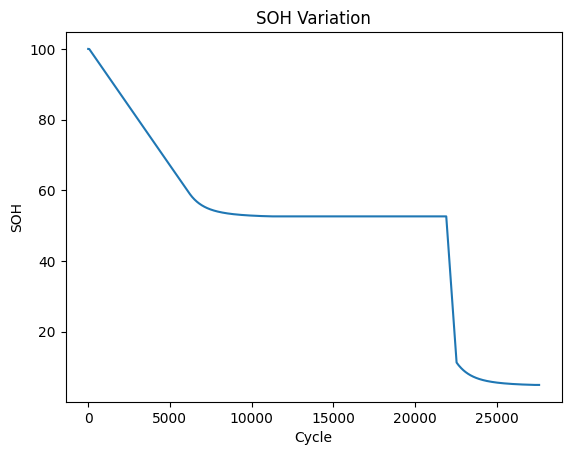

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
import random 

x = np.array(range(0, len(soh)))
y = soh
z= data['Current(A)']
plt.title("SOH Variation") 
plt.xlabel("Cycle") 
plt.ylabel("SOH") 
plt.plot(x,y)
plt.show()

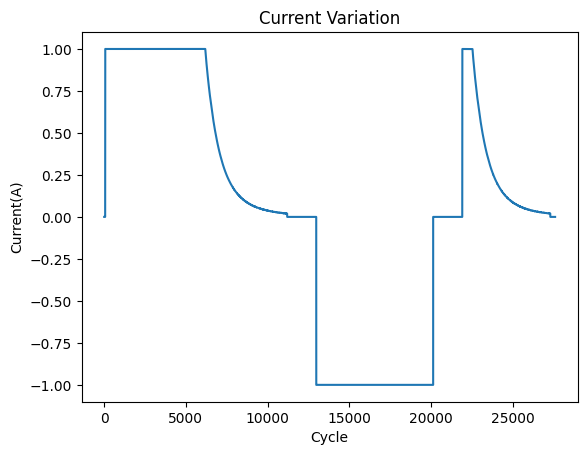

In [ ]:
x = np.array(range(0, len(soh)))
y = data['Current(A)']
plt.title("Current Variation") 
plt.xlabel("Cycle") 
plt.ylabel("Current(A)") 
plt.plot(x,y) 
plt.show()

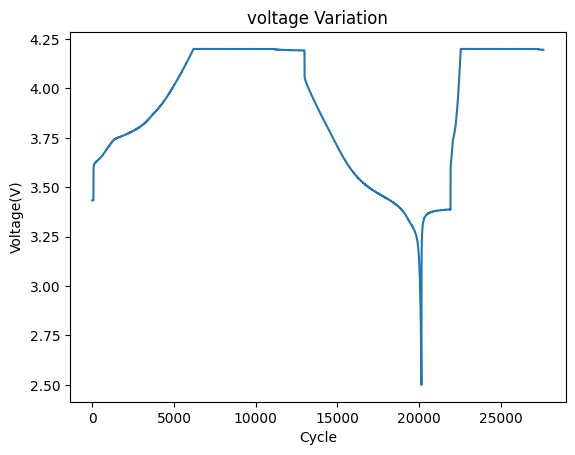

In [ ]:
x = np.array(range(0, len(soh)))
y = data['Voltage(V)']
plt.title("voltage Variation") 
plt.xlabel("Cycle") 
plt.ylabel("Voltage(V)") 
plt.plot(x,y) 
plt.show()

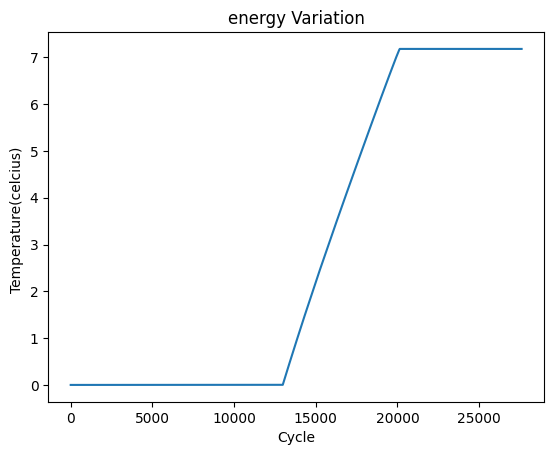

In [ ]:
x = np.array(range(0, len(soh)))
y = data['Discharge_Energy(Wh)']
plt.title("energy Variation") 
plt.xlabel("Cycle") 
plt.ylabel("Temperature(celcius) ") 
plt.plot(x,y) 
plt.show()

In [ ]:
data


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg),SOH
0,1,1.001205,10/16/2015 09:34:19,1.001206,1,1,0.0,3.434257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,100.000000
1,2,2.016763,10/16/2015 09:34:20,2.016764,1,1,0.0,3.434418,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0,100.000000
2,3,3.032254,10/16/2015 09:34:21,3.032255,1,1,0.0,3.434581,0.000000,0.000000,0.000000,0.000000,0.000065,0.000000,0,0,0,100.000000
3,4,4.032554,10/16/2015 09:34:22,4.032555,1,1,0.0,3.434581,0.000000,0.000000,0.000000,0.000000,0.000065,0.000000,0,0,0,100.000000
4,5,5.047983,10/16/2015 09:34:23,5.047983,1,1,0.0,3.434257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27597,27598,33517.465620,10/16/2015 18:52:57,296.183986,12,1,0.0,4.195723,4.005512,2.009444,15.628879,7.179247,-0.000065,0.120664,0,0,0,4.943716
27598,27599,33518.465880,10/16/2015 18:52:58,297.184251,12,1,0.0,4.195885,4.005512,2.009444,15.628879,7.179247,0.000000,0.120664,0,0,0,4.943716
27599,27600,33519.481440,10/16/2015 18:52:59,298.199807,12,1,0.0,4.195885,4.005512,2.009444,15.628879,7.179247,0.000000,0.120664,0,0,0,4.943716
27600,27601,33520.497040,10/16/2015 18:53:00,299.215413,12,1,0.0,4.195885,4.005512,2.009444,15.628879,7.179247,0.000032,0.120664,0,0,0,4.943716


In [ ]:
features = data[['Current(A)','Voltage(V)']]
target = data['SOH']

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

In [ ]:
np.shape(features_train),np.shape( features_test),np.shape(target_train),np.shape(target_test)

((22081, 2), (5521, 2), (22081,), (5521,))

In [ ]:
ss= np.shape(features_train)[0] #sample size
ss

22081

In [ ]:
model = RandomForestRegressor()

for  k in range(100,ss,100):
  kk = random.randint(100,ss)
  model.fit(features_train[kk-100:kk], target_train[kk-100:kk])

In [ ]:
import pickle

# Assuming that you have trained a model called "model"
# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
test_score = model.score(features_test, target_test)

# Evaluation metrics
There are several evaluation metrics that can be used to assess the performance of a Random Forest Regression (RFR) model. Here are some of the most common ones:

Mean Squared Error (MSE): This measures the average squared difference between the predicted and actual values. It's commonly used to evaluate regression models, including RFR.

Root Mean Squared Error (RMSE): This is the square root of the MSE and measures the average magnitude of the error in the same units as the target variable.

Mean Absolute Error (MAE): This measures the average absolute difference between the predicted and actual values. It's less sensitive to outliers than MSE and RMSE.

R-squared (R2): This measures the proportion of variance in the target variable that can be explained by the model. A value of 1 indicates a perfect fit, while a value of 0 indicates that the model doesn't explain any of the variance.

Explained Variance Score (EVS): This measures the proportion of variance in the target variable that can be explained by the model. Like R2, a value of 1 indicates a perfect fit, while a value of 0 indicates that the model doesn't explain any of the variance. However, EVS is less sensitive to the scaling of the target variable than R2.

Mean Percentage Error (MPE): This measures the average percentage difference between the predicted and actual values. It's commonly used in forecasting applications where the target variable has a natural scale, such as sales or revenue.

Mean Absolute Percentage Error (MAPE): This is the absolute value of the percentage difference between the predicted and actual values, averaged over all samples. Like MPE, it's commonly used in forecasting applications.

When evaluating a RFR model, it's important to choose an appropriate evaluation metric based on the specific application and the desired trade-off between bias and variance. For example, MSE and RMSE are commonly used when the goal is to minimize the overall error, while MAE and MAPE are less sensitive to outliers and may be more appropriate in applications where accuracy is more important than precision.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [ ]:
pred = model.predict(features_test)

In [ ]:
mse = mean_squared_error(target_test,pred)
rmse = mean_squared_error(target_test,pred, squared=False)
mae = mean_absolute_error(target_test,pred)
r2 = r2_score(target_test,pred)
evs = explained_variance_score(target_test,pred)

In [ ]:
# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 426.2497203880492
Root Mean Squared Error (RMSE): 20.645816050426518
Mean Absolute Error (MAE): 11.725815680895607
R-squared (R2): 0.2735939412491758
Explained Variance Score (EVS): 0.28254602032785137


In [ ]:
Current_sensor = 4
voltage_sensor = 8
temperature_sensor = 7
sensor_input = np.array([[Current_sensor , voltage_sensor]])
prediction = model.predict(sensor_input)

print('Test Score: ', test_score)
print('Prediction: ', prediction)

Test Score:  0.2735939412491758
Prediction:  [44.51573781]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


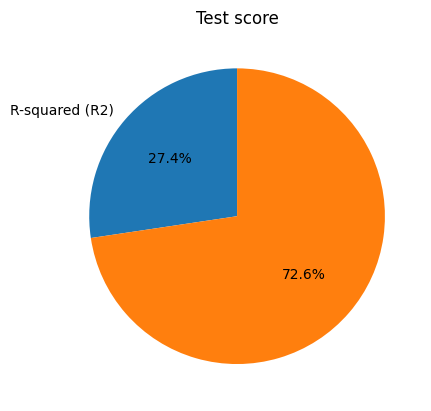

[0.2735939412491758, 0.7264060587508242]

In [ ]:
sizes = [r2, 1-r2 ] 
labels = ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)', 'Explained Variance Score (EVS)']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=[labels[3], ''], autopct='%1.1f%%', startangle=90)

# Add title
ax.set_title('Test score')

# Show the plot
plt.show()

sizes